In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Hidden Layer & Output Layer
import keras
from keras import layers


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Assigning Training and test data

In [ ]:
# Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
#test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/Shoe Classification/train",
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT), # HEIGHT AND WIDTH

                                                 subset= 'training',
                                               #  batch_size = 100, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/Shoe Classification/test",
                                           target_size=(IMG_WIDTH, IMG_HEIGHT),

                                           #  batch_size = 15,
                                            class_mode = 'categorical',
                                            subset='validation')



Found 650 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [ ]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [ ]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


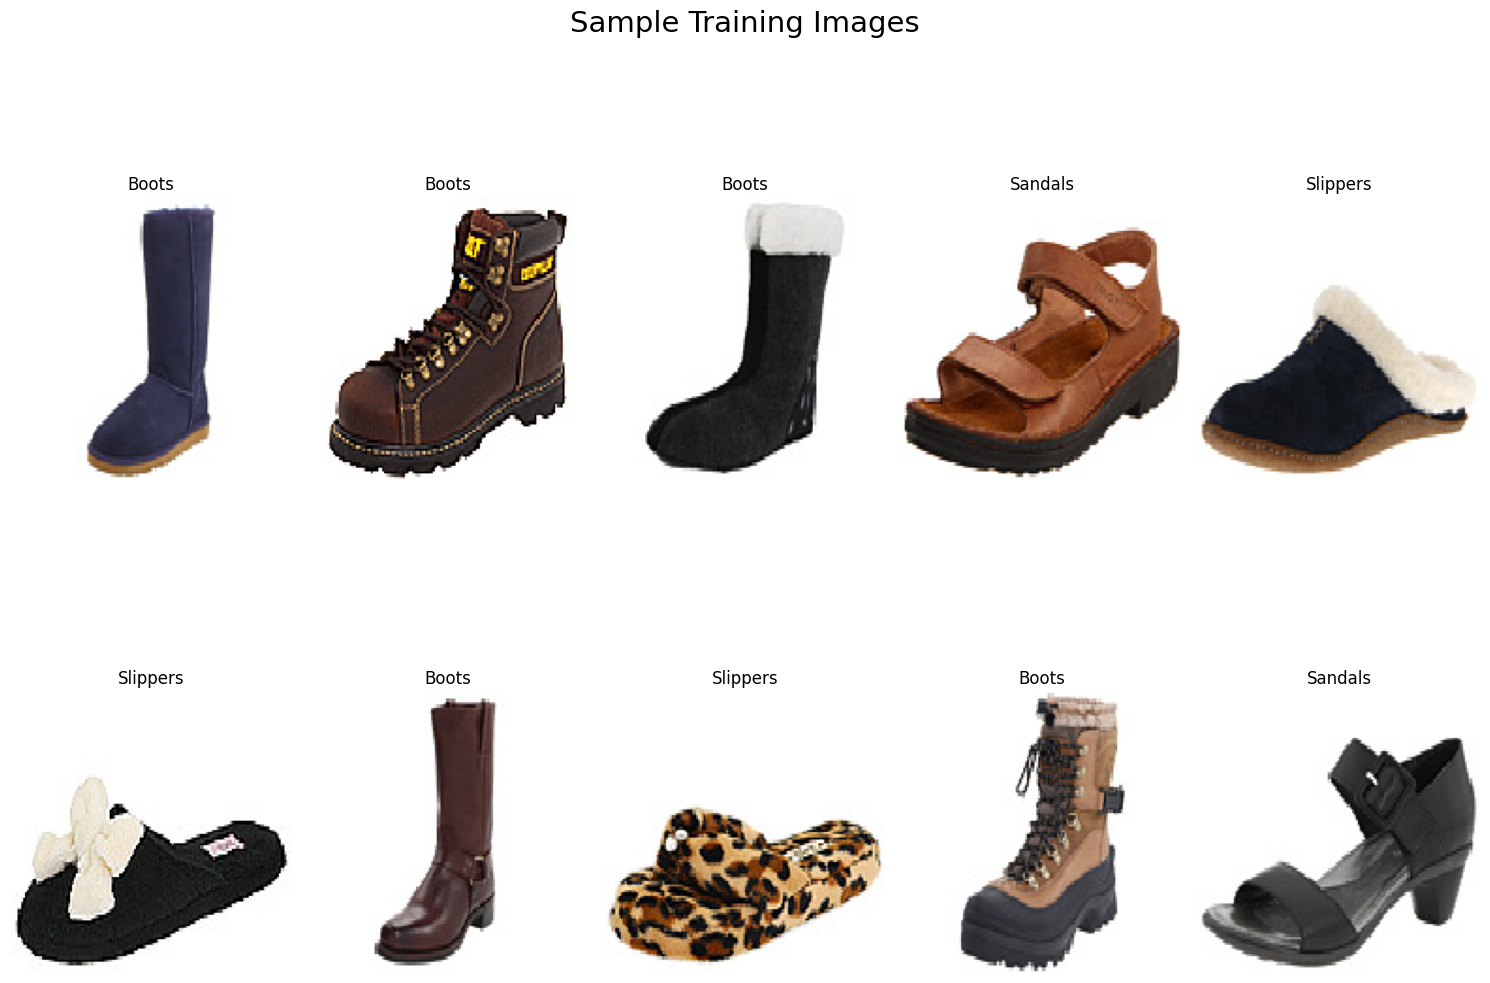

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 3)


# Training a CNN Model

In [ ]:
# Initialising the CNN
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
# Compiling the CNN
epochs = 12 # awalnya 20

tf.random.set_seed(1)
model.build(input_shape=(16, 102,136,3))
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 34, 34, 64)        0

In [ ]:
result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=10)

Epoch 1/10
21/21 [==============================] - 216s 10s/step - loss: 0.9133 - accuracy: 0.5585
Epoch 2/10
21/21 [==============================] - 17s 795ms/step - loss: 0.4975 - accuracy: 0.7723
Epoch 3/10
21/21 [==============================] - 17s 789ms/step - loss: 0.4069 - accuracy: 0.8123
Epoch 4/10
21/21 [==============================] - 16s 758ms/step - loss: 0.3376 - accuracy: 0.8585
Epoch 5/10
21/21 [==============================] - 17s 806ms/step - loss: 0.2840 - accuracy: 0.8708
Epoch 6/10
21/21 [==============================] - 16s 779ms/step - loss: 0.2516 - accuracy: 0.8815
Epoch 7/10
21/21 [==============================] - 17s 775ms/step - loss: 0.2105 - accuracy: 0.9046
Epoch 8/10
21/21 [==============================] - 17s 782ms/step - loss: 0.2179 - accuracy: 0.9138
Epoch 9/10
21/21 [==============================] - 17s 791ms/step - loss: 0.1727 - accuracy: 0.9231
Epoch 10/10
21/21 [==============================] - 16s 743ms/step - loss: 0.1541 - accurac

In [ ]:
model.save('shoe_classifier.h5')

In [ ]:
from keras.models import load_model
!pip install tensorflow
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
new_model = load_model("shoe_classifier.h5")

In [ ]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/CNN/Shoe Classification/test")

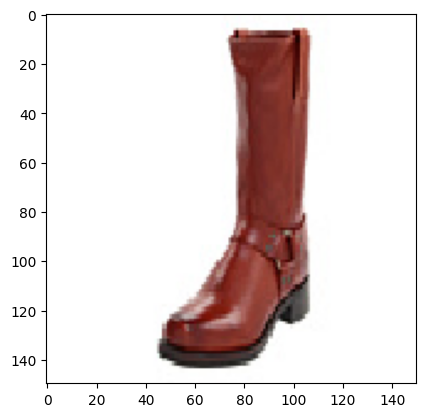

1/1 [==============================] - 0s 282ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/CNN/Shoe Classification/test/image (2).jpg")

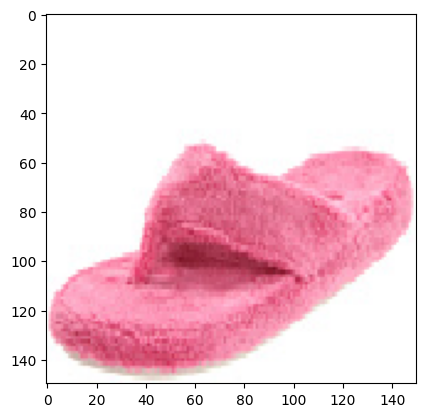

1/1 [==============================] - 0s 81ms/step
Prediction is Slippers.
[[0. 0. 1.]]



In [ ]:
model_output(r"/content/drive/MyDrive/CNN/Shoe Classification/test/image (36).jpg")

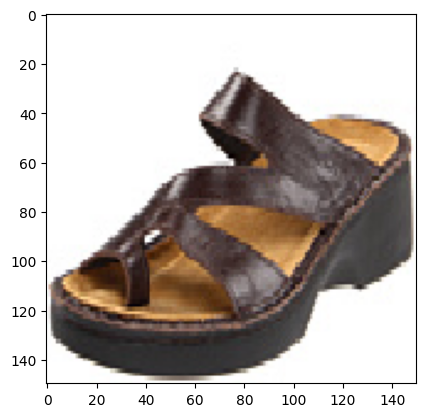

1/1 [==============================] - 0s 172ms/step
Prediction is Sandal.
[[0. 1. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/CNN/Shoe Classification/test/image (17).jpg")

# Accuracy of Model

In [ ]:
score = model.evaluate(training_set,verbose=0)
print("Accuracy and loss of model-----------------------------------------------")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model-----------------------------------------------
Train Loss : 0.1487
Train Accuracy : 0.9569
